In [1]:
cd ../

/Users/creator/Projects/CS6241


In [61]:
from fairrecs.preprocessor import preprocess_yow
from fairrecs.solver import Solver
from fairrecs.dp_solver import DPSolver
from fairrecs.dt_solver import DTSolver
from fairrecs.di_solver import DISolver
from benchmarks.yow_benchmarks import cost_of_fairness as cof
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns

In [52]:
# Configuration
sns.set_palette('colorblind')

In [3]:
dataset = preprocess_yow('datasets/yow_userstudy_raw.csv')
dataset.head()

,EventOnScroll,MSecForDownArrow,TimeOnVScroll,relevant,NumOfPageUp,TimeOnMouse,NumOfPageDown,ClickOnWindow,log_id,serverTimeVisit,...,readability,TimeOnHScroll,novelty,user_like,DOC_ID,TimeOnPage,TimeVisit,user_id,NumOfDownArrow,authority
9780,0.0,0.0,0.0,0.573569,0,2156,0.0,0.0,5851,2004-05-02 18:40,...,1.0,0.0,2.0,3,295842,106781.0,2004-05-02 18:40,92,0.0,1.0
9781,0.0,0.0,0.0,0.315096,0,3934,0.0,0.0,5855,2004-05-02 18:42,...,1.0,0.0,4.0,4,282679,129141.0,2004-05-02 18:42,92,0.0,1.0
9782,0.0,0.0,0.0,0.388795,0,4280,0.0,1.0,5861,2004-05-02 18:45,...,1.0,0.0,2.0,3,295838,107500.0,2004-05-02 18:45,92,0.0,1.0
9784,0.0,0.0,0.0,0.451485,0,3339,0.0,0.0,5868,2004-05-02 18:50,...,1.0,0.0,2.0,4,281594,147469.0,2004-05-02 18:50,92,0.0,1.0
9785,0.0,0.0,0.0,0.593357,0,4561,0.0,1.0,5872,2004-05-02 18:53,...,1.0,0.0,2.0,4,294299,178390.0,2004-05-02 18:53,92,0.0,1.0


In [4]:
solver = Solver(dataset['relevant'].to_numpy())
P = solver.solve()
print(P)

[[-6.04106017e-06 -5.96211598e-06 -6.06164034e-06 ...  2.36832443e-05
   1.27556867e-05  1.06363130e-05]
 [-2.30657305e-05 -2.28240187e-05 -2.28658004e-05 ...  7.06456467e-06
   2.65591275e-01  7.35273868e-01]
 [ 3.55705034e-05  3.57658049e-05  3.57075590e-05 ...  2.01234829e-01
   9.05030358e-02  2.50873043e-05]
 ...
 [ 1.41767169e-05  1.41269287e-05  1.39817358e-05 ...  4.36196870e-05
   3.26916175e-05  3.05717528e-05]
 [-7.12460671e-06 -6.92326065e-06 -6.97936226e-06 ...  2.88034484e-01
   2.73290779e-01  1.28334605e-01]
 [ 1.86540547e-07  1.08124295e-07 -4.72245674e-08 ...  2.95669463e-05
   1.86387630e-05  1.65187892e-05]]


In [5]:
solver_dp = DPSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
P_dp = solver_dp.solve()
print(P_dp)

[[-3.17233978e-05 -9.93109292e-05 -6.97892983e-06 ... -5.34021382e-05
  -7.28981192e-05 -7.55600020e-05]
 [-9.77214073e-06 -7.78765425e-05  1.42720942e-05 ... -8.56132107e-06
   2.91791152e-01  7.09705586e-01]
 [ 5.58511282e-05 -1.21058971e-05  8.00950221e-05 ...  1.09393339e-01
   1.16101627e-04 -5.43436744e-06]
 ...
 [ 1.81257554e-05 -4.14092993e-06  1.04268895e-04 ...  9.54921104e-05
   7.61763570e-05  7.36872879e-05]
 [-9.08378953e-05 -1.13902060e-04 -5.77514561e-06 ...  2.68509684e-01
   3.01579681e-01  2.16212133e-01]
 [-2.51161285e-05 -4.72919051e-05  6.11501706e-05 ...  5.24489002e-05
   3.31335084e-05  3.06447859e-05]]


In [6]:
solver_dt = DTSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
P_dt = solver_dt.solve()
print(P_dt)

[[ 2.56281224e-05  2.85451200e-05  2.62082945e-05 ...  5.14806726e-05
   5.55803812e-05  3.71093990e-06]
 [ 9.17059019e-06  1.20808112e-05  9.74158161e-06 ...  3.50083294e-05
   2.52260680e-01  7.47209282e-01]
 [ 8.67519615e-06  1.15873494e-05  9.24880525e-06 ...  3.00941676e-01
   3.00593923e-01  3.06599115e-02]
 ...
 [-4.18368961e-05 -2.01832310e-05 -1.58731180e-05 ...  2.49631468e-05
   2.91373657e-05 -2.26606305e-05]
 [-1.62826052e-05  5.36060422e-06  9.66700803e-06 ...  1.18022735e-01
  -1.04569062e-04  3.44351814e-06]
 [-3.93642512e-05 -1.77093942e-05  9.99987475e-01 ...  2.74383965e-05
   3.16126201e-05 -2.01853716e-05]]


In [7]:
solver_di = DISolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
P_di = solver_di.solve()
print(P_di)

[[ 2.39347495e-05  6.85756750e-06 -3.68008912e-05 ...  2.69807490e-06
   1.37656590e-05  1.59569675e-05]
 [ 4.96830091e-08 -1.48839363e-05 -5.77819540e-05 ... -1.73917519e-05
   6.50779152e-02  9.35331434e-01]
 [ 1.72681615e-06 -1.38180019e-05 -5.69328458e-05 ...  2.54821418e-01
   1.66262204e-01  3.30056967e-05]
 ...
 [-4.05251522e-05 -3.59166565e-05 -7.18819986e-05 ... -1.43695073e-05
  -3.21568571e-06 -9.41687178e-07]
 [-2.68512107e-05 -3.09204487e-05 -6.99642658e-05 ...  3.18971444e-01
   3.21912920e-01  1.93419959e-05]
 [-6.91162385e-05  3.39571659e-04  2.27745369e-02 ... -4.07987356e-05
  -2.96409801e-05 -2.73632096e-05]]


In [8]:
u = dataset['relevant'].to_numpy()
v = np.array([1.0 / (np.log(2 + i)) for i, _ in enumerate(u)])

In [9]:
print("Expected utility: ", solver.expected_utility())
print("Demographic parity expected utility: ", solver_dp.expected_utility())
print("Cost of fairness: ", cof(u, P, P_dp, v))

Expected utility:  10.015960736109562
Demographic parity expected utility:  10.015767858885782
Cost of fairness:  0.0001928772237778672


In [10]:
print("Expected utility: ", solver.expected_utility())
print("Disparate treatment expected utility: ", solver_dt.expected_utility())
print("Cost of fairness: ", cof(u, P, P_dt, v))

Expected utility:  10.015960736109562
Disparate treatment expected utility:  10.013182083104368
Cost of fairness:  0.002778653005192875


In [11]:
print("Expected utility: ", solver.expected_utility())
print("Disparate impact expected utility: ", solver_di.expected_utility())
print("Cost of fairness: ", cof(u, P, P_di, v))

Expected utility:  10.015960736109562
Disparate impact expected utility:  10.015983733510575
Cost of fairness:  -2.2997401009993302e-05


In [43]:
solver_dpa = DPSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
solver_dta = DTSolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
solver_dia = DISolver(dataset['relevant'].to_numpy(), dataset['RSS_ID'].to_numpy())
count = 51
X = 1 - np.logspace(3,1,count)/2000
Y = np.zeros([count, 3])
C = np.zeros([count, 3])
for i, alpha in enumerate(X):
    if i % 3 == 1:
        print("Round ", i)
    solver_dpa.alpha = alpha
    solver_dta.alpha = alpha
    solver_dia.alpha = alpha
    P_dpa = solver_dpa.solve()
    P_dta = solver_dta.solve()
    P_dia = solver_dia.solve()
    Y[i, 0] = solver_dpa.expected_utility()
    Y[i, 1] = solver_dta.expected_utility()
    Y[i, 2] = solver_dia.expected_utility()
    C[i, 0] = cof(u, P, P_dpa, v)
    C[i, 1] = cof(u, P, P_dta, v)
    C[i, 2] = cof(u, P, P_dia, v)
#print(P_dpa)
#print("Demographic parity approximated expected utility: ", solver_dpa.expected_utility())

#print("Cost of fairness: ", cof(u, P, P_dpa, v))
#plot(x1, y1, 'g^', x2, y2, 'g-')

Round  1
Round  4
Round  7
Round  10
Round  13
Round  16
Round  19
Round  22
Round  25
Round  28
Round  31
Round  34
Round  37
Round  40
Round  43
Round  46
Round  49


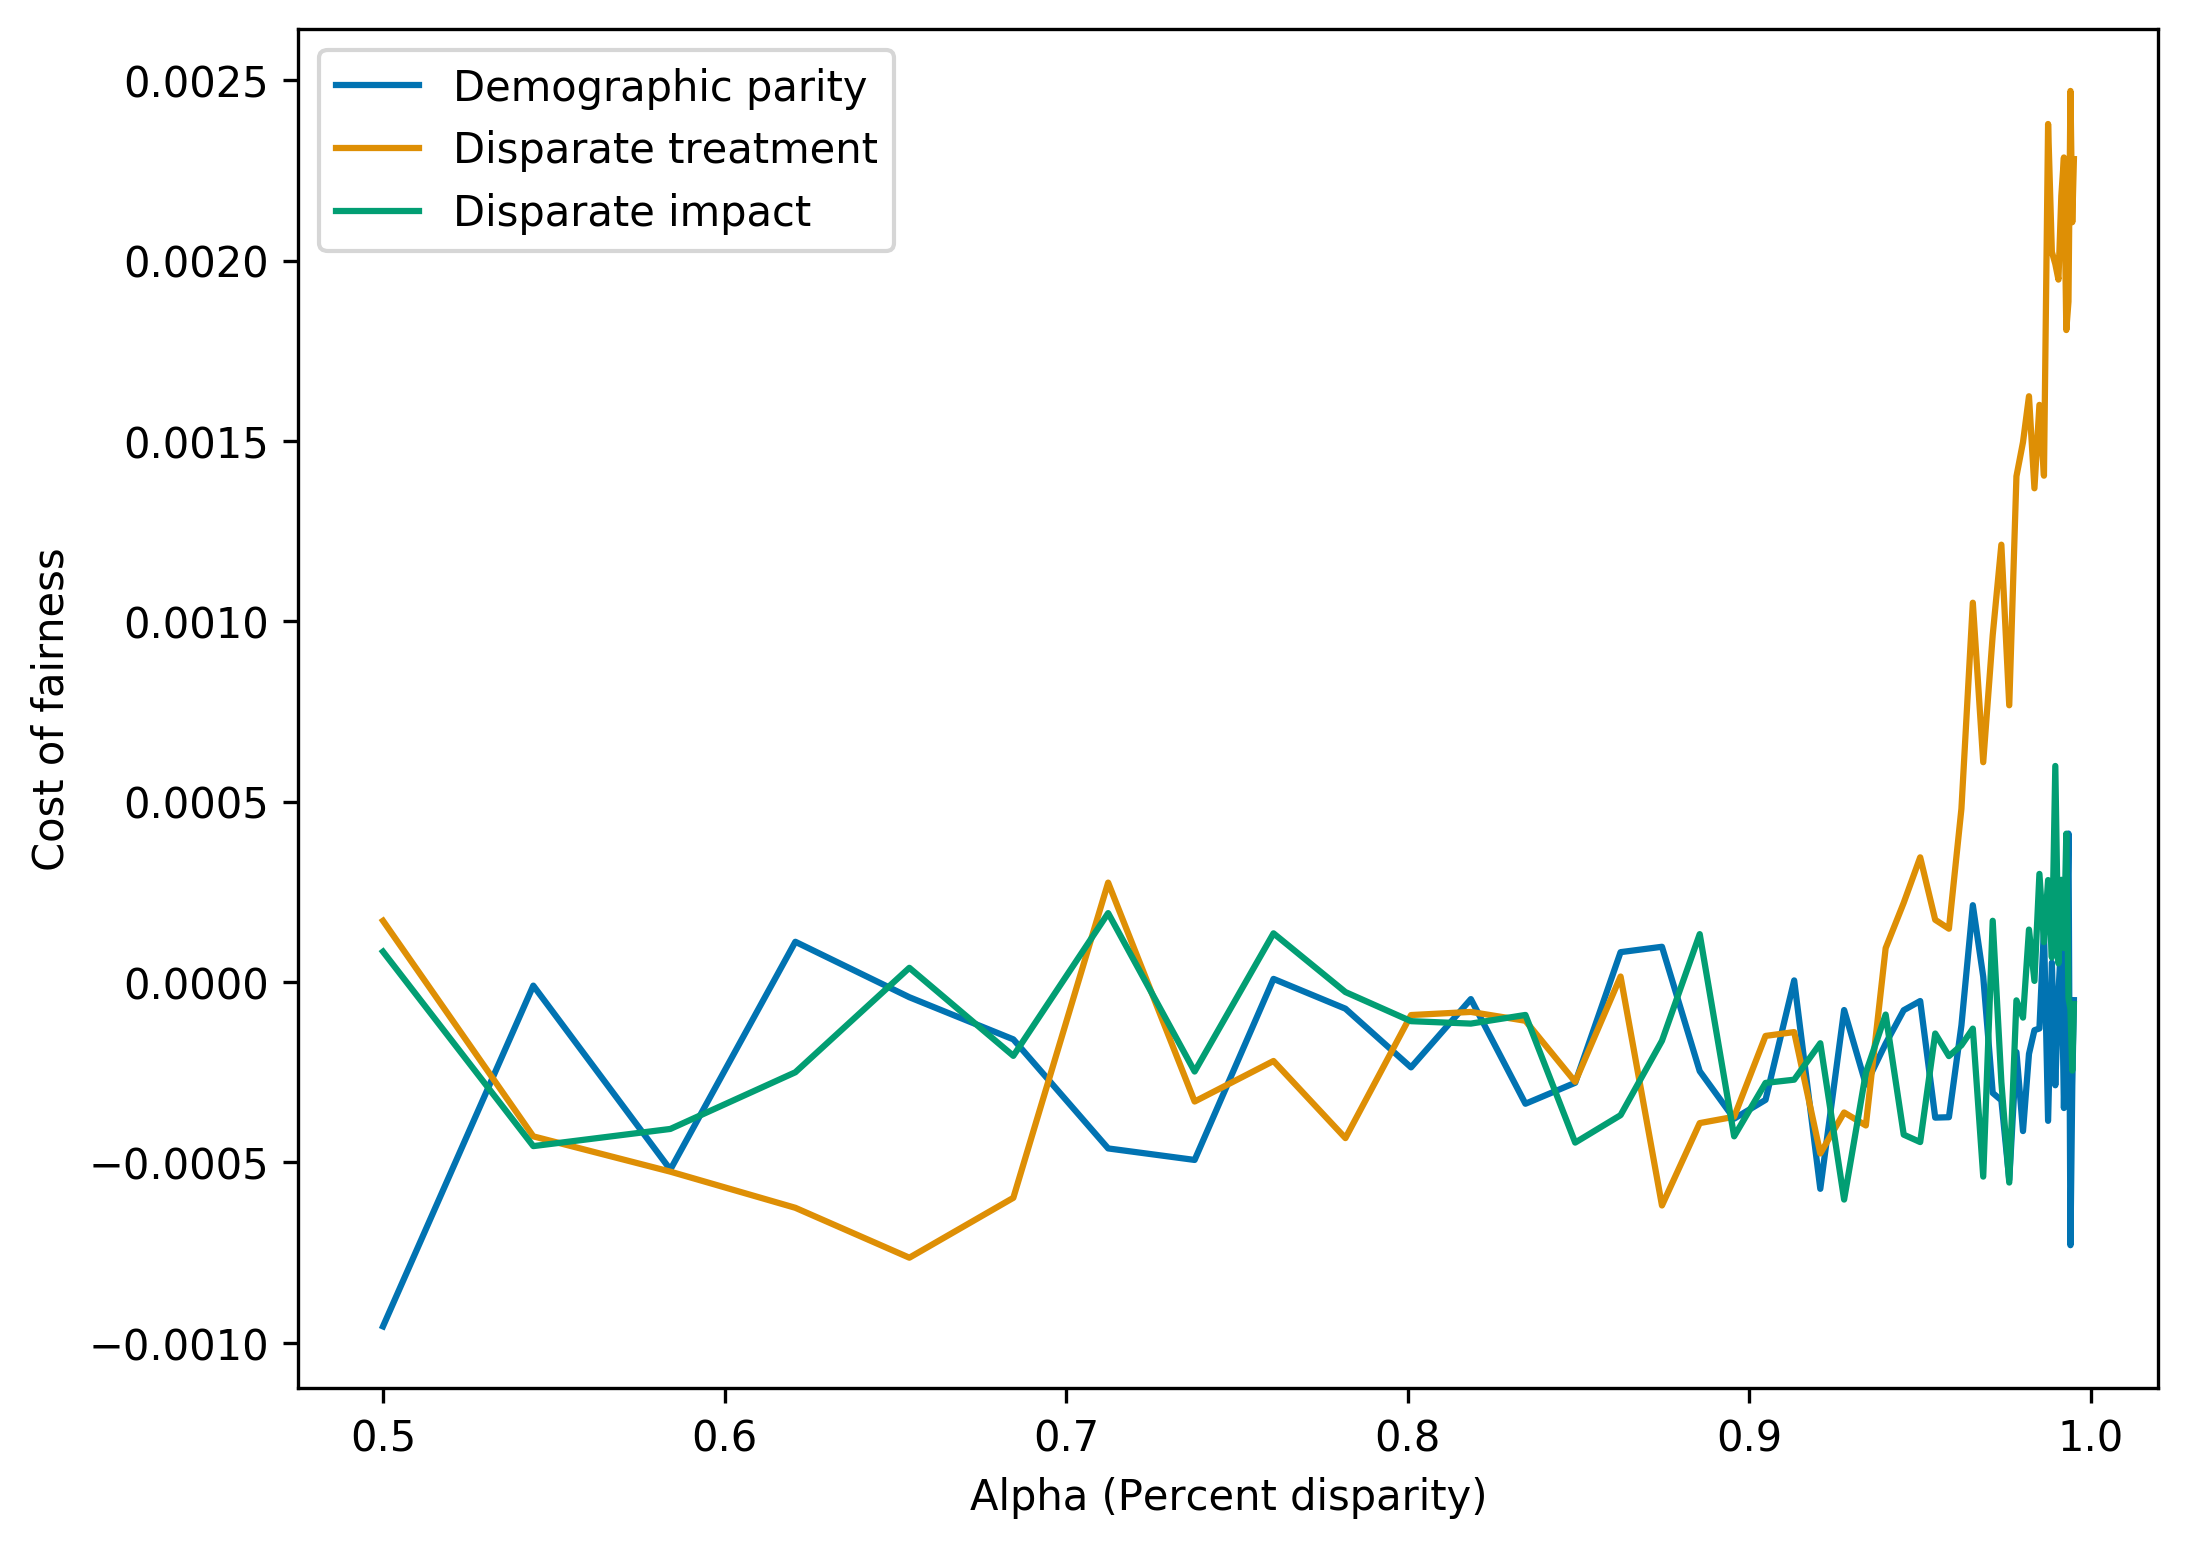

In [84]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plot(X, C[:,0], label="Demographic parity")
plot(X, C[:,1], label="Disparate treatment")
plot(X, C[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Cost of fairness')
plt.legend()
plt.show()

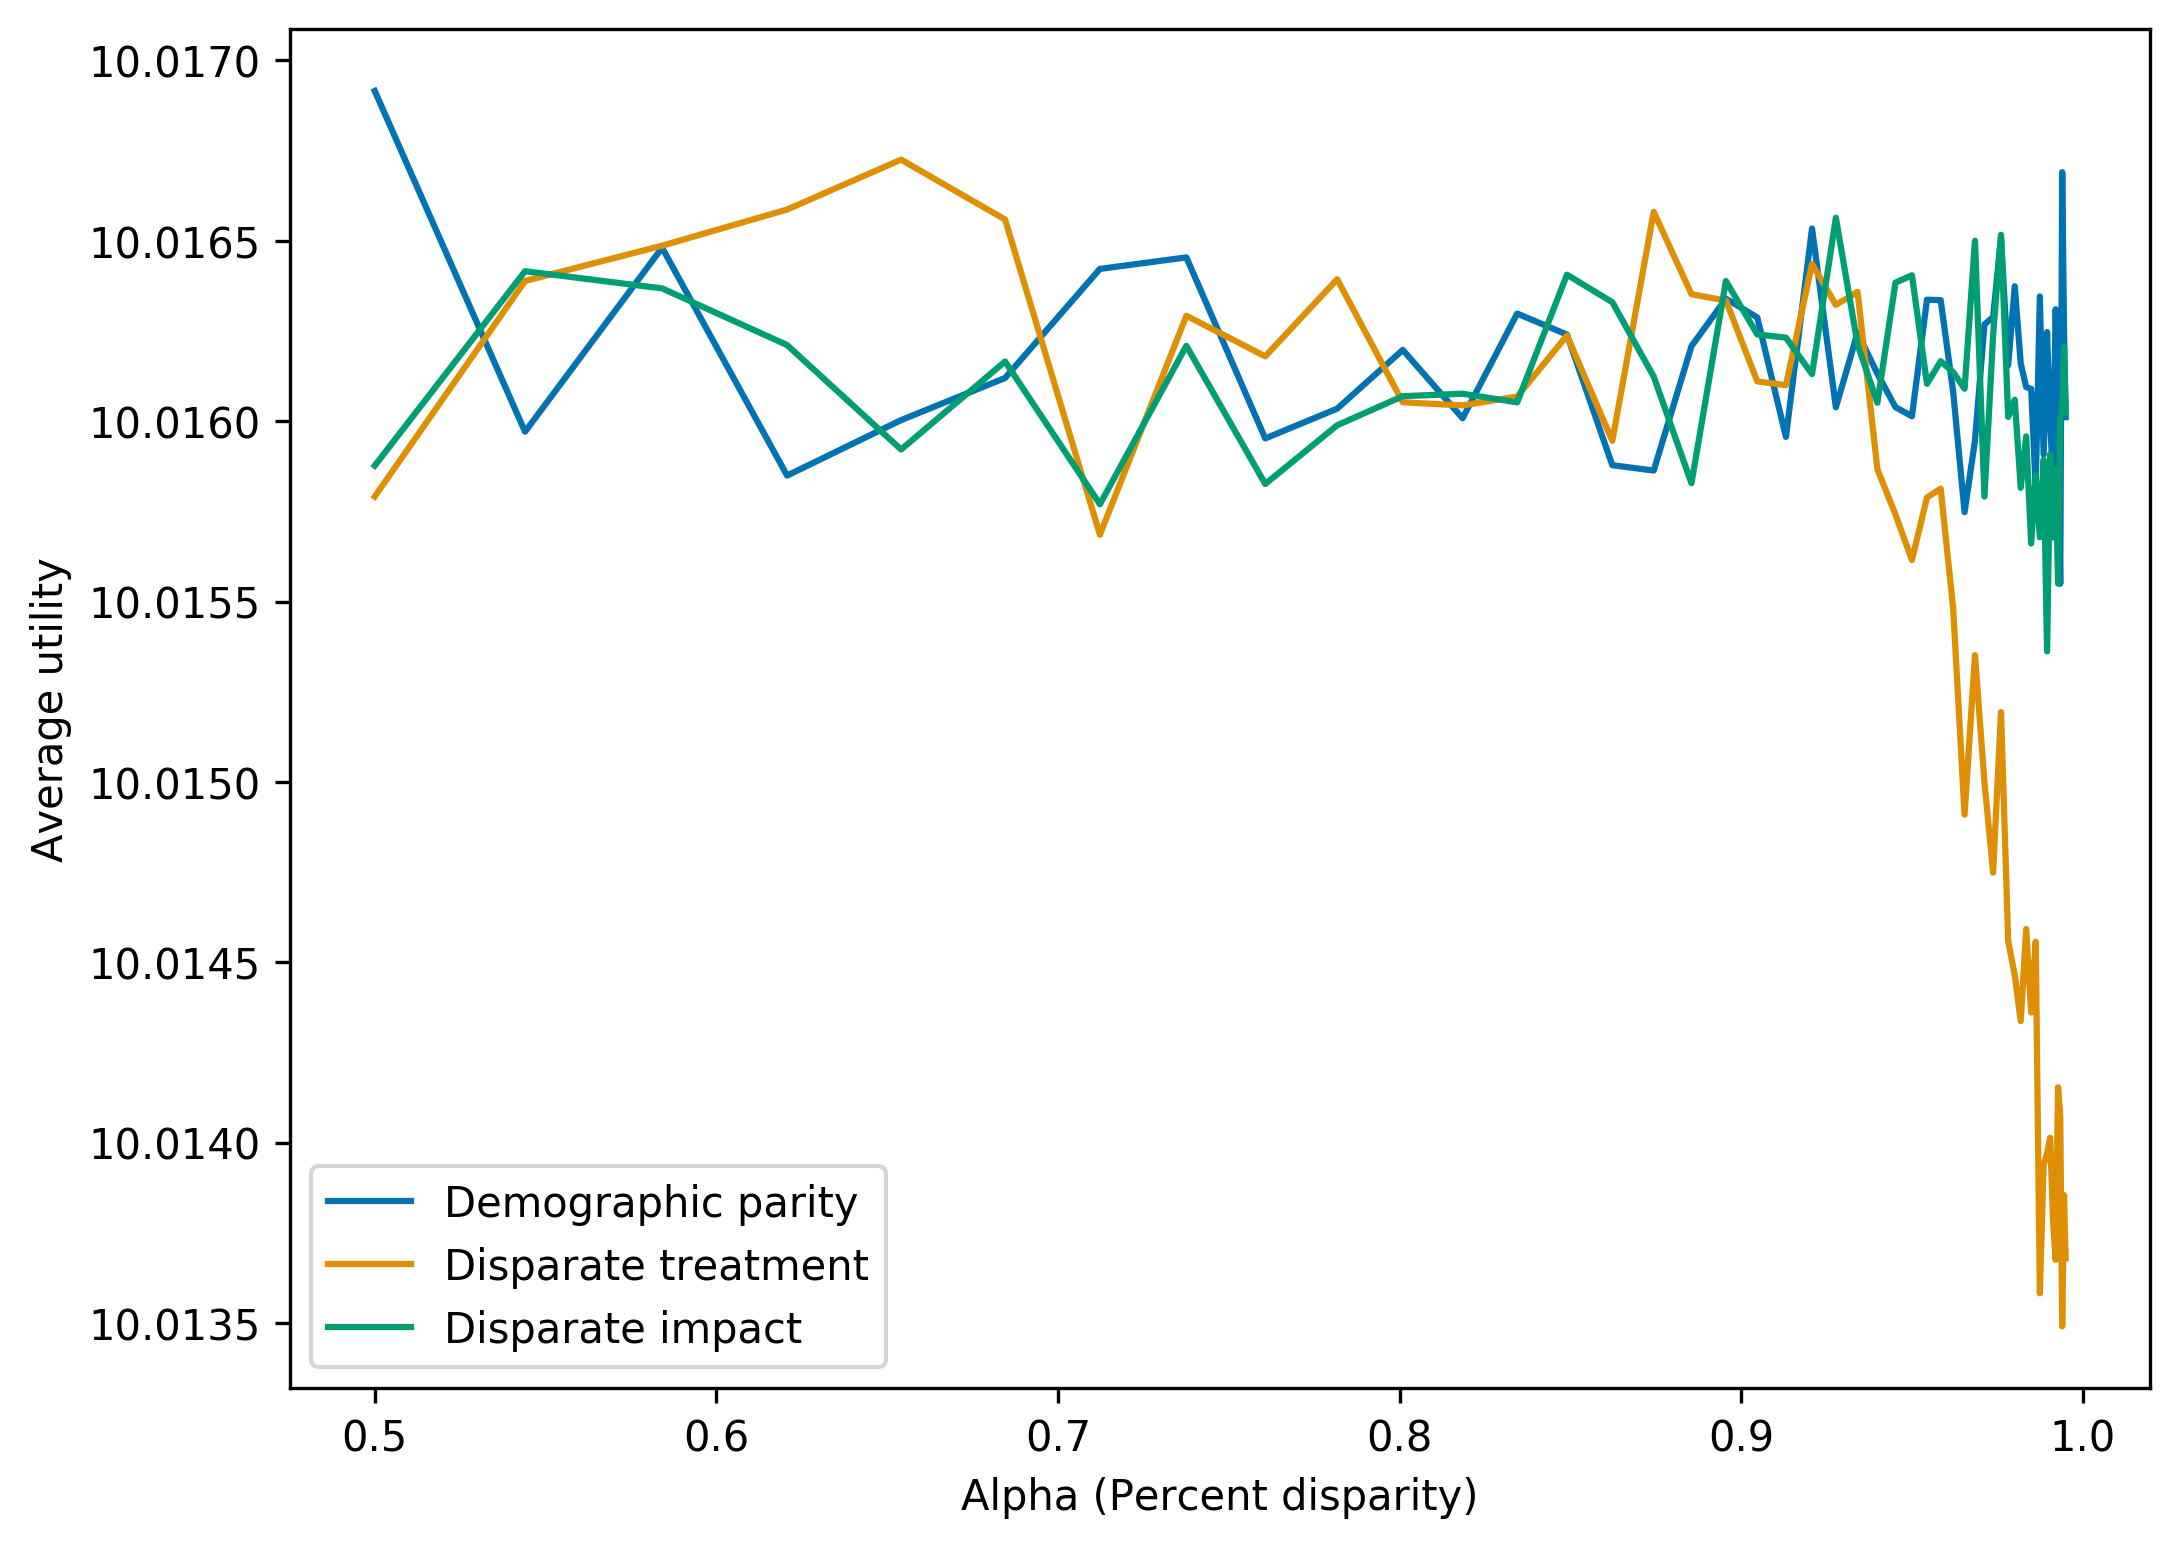

In [85]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.ticklabel_format(useOffset=False)
plot(X, Y[:,0], label="Demographic parity")
plot(X, Y[:,1], label="Disparate treatment")
plot(X, Y[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Average utility')
plt.legend()
plt.show()

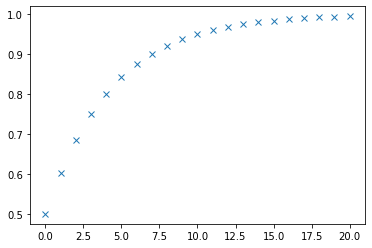

In [37]:
plot(1 - np.logspace(3,1,21)/2000, 'x')

In [46]:
Y

array([[10.01691551, 10.01579099, 10.01587658],
       [10.01597074, 10.01638863, 10.01641571],
       [10.01648087, 10.01648649, 10.0163681 ],
       [10.01584918, 10.01658674, 10.016211  ],
       [10.01600292, 10.01672507, 10.01592139],
       [10.01611971, 10.0165591 , 10.01616544],
       [10.01642211, 10.01568516, 10.01576971],
       [10.01645404, 10.01629213, 10.01620894],
       [10.0159521 , 10.01617972, 10.0158258 ],
       [10.01603471, 10.01639349, 10.01598861],
       [10.01619748, 10.01605235, 10.01606931],
       [10.0160081 , 10.01604369, 10.01607606],
       [10.01629828, 10.01606821, 10.01605206],
       [10.0162401 , 10.0162374 , 10.01640595],
       [10.01587798, 10.0159455 , 10.01632989],
       [10.01586306, 10.01658029, 10.01612361],
       [10.01620785, 10.0163519 , 10.01582798],
       [10.01633966, 10.01633436, 10.01638861],
       [10.01628752, 10.01611017, 10.01624047],
       [10.01595625, 10.01609955, 10.01623154],
       [10.0165341 , 10.01643602, 10.016

In [23]:
1/A

array([1.        , 0.5       , 0.33333333])